<a href="https://colab.research.google.com/github/mohammed21kamal/AI-Faction-Expressions/blob/main/probabilityOfAllUsersWithAllGenres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [3]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
movies_ratings = pd.merge(ratings, movies, on="movieId")

In [6]:
movies_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [7]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [8]:
movies_ratings = movies_ratings[['userId', 'movieId', 'genres']]

In [9]:
movies_ratings.columns

Index(['userId', 'movieId', 'genres'], dtype='object')

In [10]:
movies_ratings.head()

,userId,movieId,genres
0,1,296,Comedy|Crime|Drama|Thriller
1,3,296,Comedy|Crime|Drama|Thriller
2,4,296,Comedy|Crime|Drama|Thriller
3,5,296,Comedy|Crime|Drama|Thriller
4,7,296,Comedy|Crime|Drama|Thriller


In [11]:
movies_ratings = movies_ratings.sort_values(by='userId', ascending=True)

In [12]:
movies_ratings.head()

,userId,movieId,genres
0,1,296,Comedy|Crime|Drama|Thriller
7356,1,6016,Action|Adventure|Crime|Drama|Thriller
7722,1,6370,Comedy|Drama|Romance
7744,1,6377,Adventure|Animation|Children|Comedy
8379,1,6539,Action|Adventure|Comedy|Fantasy


In [22]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head()

,userId,movieId,genres
0,1,296,"[Comedy, Crime, Drama, Thriller]"
7356,1,6016,"[Action, Adventure, Crime, Drama, Thriller]"
7722,1,6370,"[Comedy, Drama, Romance]"
7744,1,6377,"[Adventure, Animation, Children, Comedy]"
8379,1,6539,"[Action, Adventure, Comedy, Fantasy]"


In [23]:
n_movies = movies_ratings['movieId'].nunique()
n_users = movies_ratings['userId'].nunique()

print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of unique movieId's: 16926
Number of unique users: 3128


In [14]:
movie_stats = ratings.groupby('userId')['movieId'].agg(['count'])
movie_stats.head()

,count
userId,
1,70
2,184
3,656
4,242
5,101


In [45]:
# تفجير القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# استخدام groupby لتجميع البيانات بناءً على 'userId' و 'genres'، ثم حساب حجم كل مجموعة
user_genre_counts = exploded_ratings.groupby(['userId', 'genres']).size().reset_index(name='No.Of Frequency')

# طباعة النتائج
print(user_genre_counts.head())


   userId     genres  No.Of Frequency
0       1     Action                4
1       1  Adventure               11
2       1  Animation                2
3       1   Children                3
4       1     Comedy               23


In [41]:
# للوصول إلى قيمة العدد للمستخدم ذي الـ userId المحدد
user_id = 50
count_for_user = movie_stats.loc[user_id, 'count']
print(f"The count for user {user_id} is: {count_for_user}")


The count for user 50 is: 81


In [31]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_ratings['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Comedy': 163804,
         'Crime': 75544,
         'Drama': 198097,
         'Thriller': 122028,
         'Action': 135213,
         'Adventure': 106666,
         'Romance': 83058,
         'Animation': 29816,
         'Children': 39344,
         'Fantasy': 51232,
         'Mystery': 35929,
         'Sci-Fi': 78203,
         'War': 23215,
         'Horror': 33671,
         'Musical': 17558,
         'Film-Noir': 4016,
         'Western': 8772,
         'Documentary': 5558,
         'IMAX': 19132,
         '(no genres listed)': 356})

In [32]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 198097), ('Comedy', 163804), ('Action', 135213), ('Thriller', 122028), ('Adventure', 106666)]


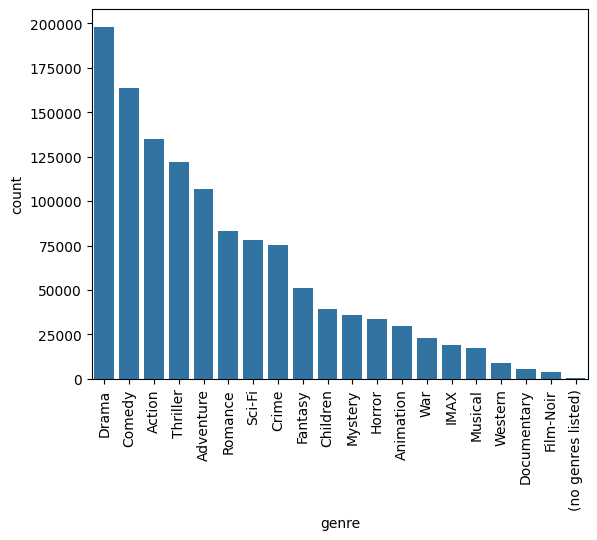

In [34]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [60]:
# قم بتحديد المستخدم
user_id_to_find = 1

# قم بالتكرار على كل الـ genres الممكنة
for genre_to_find in user_genre_counts['genres'].unique():
    # استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
    frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
    # قم بطباعة القيمة
    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{frequency_value[0] if len(frequency_value) > 0 else 0}]")


The No.Of Frequency for user '1' and genre 'Action' is: [4]
The No.Of Frequency for user '1' and genre 'Adventure' is: [11]
The No.Of Frequency for user '1' and genre 'Animation' is: [2]
The No.Of Frequency for user '1' and genre 'Children' is: [3]
The No.Of Frequency for user '1' and genre 'Comedy' is: [23]
The No.Of Frequency for user '1' and genre 'Crime' is: [8]
The No.Of Frequency for user '1' and genre 'Documentary' is: [1]
The No.Of Frequency for user '1' and genre 'Drama' is: [53]
The No.Of Frequency for user '1' and genre 'Fantasy' is: [5]
The No.Of Frequency for user '1' and genre 'Film-Noir' is: [1]
The No.Of Frequency for user '1' and genre 'Horror' is: [1]
The No.Of Frequency for user '1' and genre 'Musical' is: [5]
The No.Of Frequency for user '1' and genre 'Mystery' is: [4]
The No.Of Frequency for user '1' and genre 'Romance' is: [18]
The No.Of Frequency for user '1' and genre 'Sci-Fi' is: [5]
The No.Of Frequency for user '1' and genre 'Thriller' is: [5]
The No.Of Freque

In [35]:
def user_behavior_probability(total_movies, genre_label_count):

    user_behavior_prob = genre_label_count / total_movies
    return round(user_behavior_prob, 3)


In [75]:
# # قائمة بجميع المستخدمين
# all_users = user_genre_counts['userId'].unique()

# # تفجير (تفتيت) القائمة في عمود 'genres'
# exploded_ratings = movies_ratings.explode('genres')

# # قائمة بجميع الأنواع (genres)
# all_genres = exploded_ratings['genres'].unique()

# # حلقة for لعرض احتمالية كل مستخدم وكل نوع (genre)
# for user_id_to_find in all_users:
#     for genre_to_find in all_genres:
#         # حساب إجمالي عدد الأفلام التي قام المستخدم بتقييمها
#         total_movies_rated_by_user = exploded_ratings.query(f'userId == {user_id_to_find}')['movieId'].count()

#         # حساب عدد الأفلام ذات النوع الذي تريد حساب الاحتمال له
#         action_movies_count = exploded_ratings.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['movieId'].count()

#         # حساب الاحتمال
#         probability_value = user_behavior_probability(total_movies_rated_by_user, action_movies_count)

#         # طباعة النتيجة
#         print(f"The historical probability that the user No.{user_id_to_find} rated a '{genre_to_find}' movie is: {probability_value}")


Streaming output truncated to the last 5000 lines.
The historical probability that the user No.7 rated a 'Children' movie is: 0.043
The historical probability that the user No.7 rated a 'Fantasy' movie is: 0.043
The historical probability that the user No.7 rated a 'Mystery' movie is: 0.0
The historical probability that the user No.7 rated a 'Sci-Fi' movie is: 0.014
The historical probability that the user No.7 rated a 'War' movie is: 0.014
The historical probability that the user No.7 rated a 'Horror' movie is: 0.014
The historical probability that the user No.7 rated a 'Musical' movie is: 0.029
The historical probability that the user No.7 rated a 'Film-Noir' movie is: 0.0
The historical probability that the user No.7 rated a 'Western' movie is: 0.014
The historical probability that the user No.7 rated a 'Documentary' movie is: 0.0
The historical probability that the user No.7 rated a 'IMAX' movie is: 0.029
The historical probability that the user No.7 rated a '(no genres listed)' mo

KeyboardInterrupt: 

In [77]:
import pandas as pd

# قائمة بجميع المستخدمين
all_users = user_genre_counts['userId'].unique()

# تفجير (تفتيت) القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# قائمة بجميع الأنواع (genres)
all_genres = exploded_ratings['genres'].unique()

# قائمة لتخزين النتائج
results = []

# حلقة for لعرض احتمالية كل مستخدم وكل نوع (genre)
for user_id_to_find in all_users:
    for genre_to_find in all_genres:
        # حساب إجمالي عدد الأفلام التي قام المستخدم بتقييمها
        total_movies_rated_by_user = exploded_ratings.query(f'userId == {user_id_to_find}')['movieId'].count()

        # حساب عدد الأفلام ذات النوع الذي تريد حساب الاحتمال له
        action_movies_count = exploded_ratings.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['movieId'].count()

        # حساب الاحتمال
        probability_value = user_behavior_probability(total_movies_rated_by_user, action_movies_count)

        # تخزين النتيجة في القائمة
        results.append({
            'User_ID': user_id_to_find,
            'Genre': genre_to_find,
            'Probability': probability_value
        })

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(results)

# طباعة DataFrame
print(results_df)


       User_ID               Genre  Probability
0            1              Comedy        0.148
1            1               Crime        0.052
2            1               Drama        0.342
3            1            Thriller        0.032
4            1              Action        0.026
...        ...                 ...          ...
62555     3128           Film-Noir        0.000
62556     3128             Western        0.013
62557     3128         Documentary        0.000
62558     3128                IMAX        0.005
62559     3128  (no genres listed)        0.000

[62560 rows x 3 columns]
